## Twitter Text Analysis
### (Data Transfrom ,Sentiment Analysis and Word Cloud)

In [1]:
# Import the necessary packages
import psycopg2
import psycopg2.extras

import pandas as pd
import numpy as np

In [2]:
# Connect to the database
connection = psycopg2.connect(host='3.230.203.12',
                             user='compdb',
                             port=5438,
                             database='twitter',
                             password='compdbs_postgres')
connection.set_session(readonly=True, autocommit=True)

df = pd.read_sql("""SELECT users.screen_name, users.user_id ,statuses.text, statuses.created_date
                    FROM twitter.users JOIN twitter.statuses
                        On users.user_id = statuses.user_id""",
                 connection)
df

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


screen_name              user_id  \
0      4thFromOurStar  1091459141397180416   
1      4thFromOurStar  1091459141397180416   
2      4thFromOurStar  1091459141397180416   
3      4thFromOurStar  1091459141397180416   
4      4thFromOurStar  1091459141397180416   
...               ...                  ...   
42826        rincon_p            384986958   
42827        rincon_p            384986958   
42828        rincon_p            384986958   
42829        rincon_p            384986958   
42830        rincon_p            384986958   

                                                    text created_date  
0      I do enjoy playing hard to get 😉 https://t.co/...   2021-01-07  
1      .@elonmusk when's our first date? You've been ...   2021-01-07  
2      Please populate Mars with them 🙏 https://t.co/...   2020-10-29  
3                  RT @elonmusk: https://t.co/Vn0Rv0yQ5q   2020-09-15  
4      Venus may have some life on her after all, so ...   2020-09-15  
...                                                  ...          ...  
42826  RT @LeMoustier: Oh my GOSH\n1st new #Neanderth...   2020-02-18  
42827  RT @elizpingree: @riding_red @rincon_p “The ne...   2020-02-18  
42828  Skeletal remains unearthed in the famous #Shan...   2020-02-18  
42829     After the rain #london https://t.co/rgJEDrcM8A   2020-02-17  
42830  RT @skyatnightmag: Two views of red supergiant...   2020-02-14  

[42831 rows x 4 columns]

## Data Transformation

In [3]:
df['text'] = df['text'].astype(str).str.lower()
df.head()

screen_name              user_id  \
0  4thFromOurStar  1091459141397180416   
1  4thFromOurStar  1091459141397180416   
2  4thFromOurStar  1091459141397180416   
3  4thFromOurStar  1091459141397180416   
4  4thFromOurStar  1091459141397180416   

                                                text created_date  
0  i do enjoy playing hard to get 😉 https://t.co/...   2021-01-07  
1  .@elonmusk when's our first date? you've been ...   2021-01-07  
2  please populate mars with them 🙏 https://t.co/...   2020-10-29  
3              rt @elonmusk: https://t.co/vn0rv0yq5q   2020-09-15  
4  venus may have some life on her after all, so ...   2020-09-15

In [4]:
import nltk 
from nltk import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_trans'] = df['text'].apply(regexp.tokenize)
df.head()

screen_name              user_id  \
0  4thFromOurStar  1091459141397180416   
1  4thFromOurStar  1091459141397180416   
2  4thFromOurStar  1091459141397180416   
3  4thFromOurStar  1091459141397180416   
4  4thFromOurStar  1091459141397180416   

                                                text created_date  \
0  i do enjoy playing hard to get 😉 https://t.co/...   2021-01-07   
1  .@elonmusk when's our first date? you've been ...   2021-01-07   
2  please populate mars with them 🙏 https://t.co/...   2020-10-29   
3              rt @elonmusk: https://t.co/vn0rv0yq5q   2020-09-15   
4  venus may have some life on her after all, so ...   2020-09-15   

                                          text_trans  
0  [i, do, enjoy, playing, hard, to, get, https, ...  
1  [elonmusk, when, s, our, first, date, you, ve,...  
2  [please, populate, mars, with, them, https, t,...  
3           [rt, elonmusk, https, t, co, vn0rv0yq5q]  
4  [venus, may, have, some, life, on, her, after,...

In [5]:
 #Dealing with stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

#extending list with custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [7]:
 #Remove stopwords 

df['text_trans'] = df['text_trans'].apply(lambda x: 
                                          [word for word in x if word not in stopwords])
df.head()

screen_name              user_id  \
0  4thFromOurStar  1091459141397180416   
1  4thFromOurStar  1091459141397180416   
2  4thFromOurStar  1091459141397180416   
3  4thFromOurStar  1091459141397180416   
4  4thFromOurStar  1091459141397180416   

                                                text created_date  \
0  i do enjoy playing hard to get 😉 https://t.co/...   2021-01-07   
1  .@elonmusk when's our first date? you've been ...   2021-01-07   
2  please populate mars with them 🙏 https://t.co/...   2020-10-29   
3              rt @elonmusk: https://t.co/vn0rv0yq5q   2020-09-15   
4  venus may have some life on her after all, so ...   2020-09-15   

                                         text_trans  
0       [enjoy, playing, hard, get, co, rpundysyzs]  
1          [elonmusk, first, date, teasing, coming]  
2          [please, populate, mars, co, lukewptxzy]  
3                    [rt, elonmusk, co, vn0rv0yq5q]  
4  [venus, may, life, proud, even, hellish, planet]

In [8]:
#removing infrequent words 
df['text_trans'] = df['text_trans'].apply(lambda x: ' '.join([word for word in x if len(word)>2]))
df.head()

screen_name              user_id  \
0  4thFromOurStar  1091459141397180416   
1  4thFromOurStar  1091459141397180416   
2  4thFromOurStar  1091459141397180416   
3  4thFromOurStar  1091459141397180416   
4  4thFromOurStar  1091459141397180416   

                                                text created_date  \
0  i do enjoy playing hard to get 😉 https://t.co/...   2021-01-07   
1  .@elonmusk when's our first date? you've been ...   2021-01-07   
2  please populate mars with them 🙏 https://t.co/...   2020-10-29   
3              rt @elonmusk: https://t.co/vn0rv0yq5q   2020-09-15   
4  venus may have some life on her after all, so ...   2020-09-15   

                                 text_trans  
0         enjoy playing hard get rpundysyzs  
1        elonmusk first date teasing coming  
2           please populate mars lukewptxzy  
3                       elonmusk vn0rv0yq5q  
4  venus may life proud even hellish planet

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_trans'] = df['text_trans'].apply(wordnet_lem.lemmatize)
df.head()

screen_name              user_id  \
0  4thFromOurStar  1091459141397180416   
1  4thFromOurStar  1091459141397180416   
2  4thFromOurStar  1091459141397180416   
3  4thFromOurStar  1091459141397180416   
4  4thFromOurStar  1091459141397180416   

                                                text created_date  \
0  i do enjoy playing hard to get 😉 https://t.co/...   2021-01-07   
1  .@elonmusk when's our first date? you've been ...   2021-01-07   
2  please populate mars with them 🙏 https://t.co/...   2020-10-29   
3              rt @elonmusk: https://t.co/vn0rv0yq5q   2020-09-15   
4  venus may have some life on her after all, so ...   2020-09-15   

                                 text_trans  
0         enjoy playing hard get rpundysyzs  
1        elonmusk first date teasing coming  
2           please populate mars lukewptxzy  
3                       elonmusk vn0rv0yq5q  
4  venus may life proud even hellish planet

### Word Cloud 
Most used words in the entire dataset

(-0.5, 599.5, 399.5, -0.5)

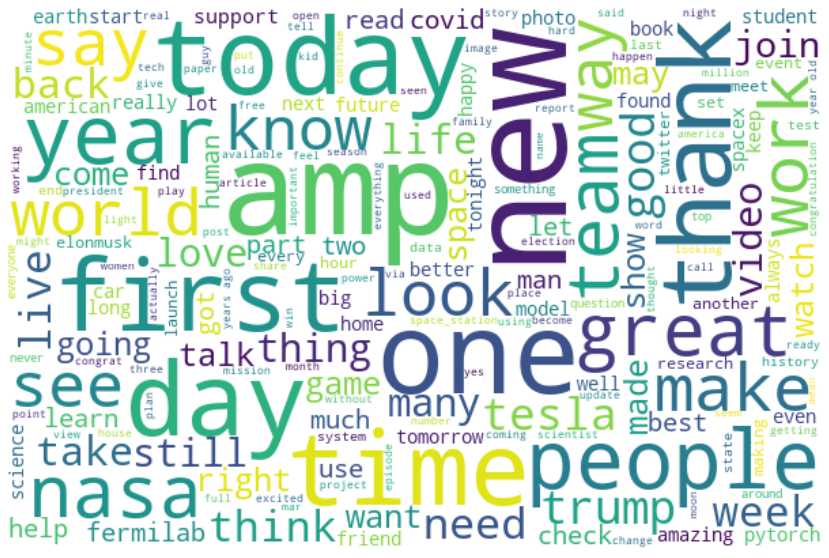

In [12]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

all_words = ' '.join([word for word in df['text_trans']])

wordcloud = WordCloud(width = 600, height = 400, random_state = 2
                     , max_font_size = 100,background_color="white" ).generate(all_words)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

## Sentiment Analysis

Running the following lines of code to import the NLTK library, along with the SentimentIntensityAnalyzer (SID) module.

In [11]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [12]:
sentence = df['text_trans'][0]
sid.polarity_scores(sentence)['compound']

0.5574

The value id 0.5574 shows that the first tweet is neurtal. When the value is closer to 1.00, it indicates that the tweet is positive and when it is closer to -1.00, it indicates that the text is negative.

In [13]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['text_trans'].apply(cleaner)

In [14]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

Creating dataframe with the attributes needed.

In [16]:
df = df[['text_trans','created_date','screen_name','user_id','sentiment','sentiment_category']]

In [17]:
df.head(10)

text_trans created_date  \
0                  enjoy playing hard get rpundysyzs   2021-01-07   
1                 elonmusk first date teasing coming   2021-01-07   
2                    please populate mars lukewptxzy   2020-10-29   
3                                elonmusk vn0rv0yq5q   2020-09-15   
4           venus may life proud even hellish planet   2020-09-15   
5                                         vug6anttyv   2020-09-03   
6  elonmusk rumor bill gates amp lovers completel...   2020-07-30   
7                              elonmusk mars souldog   2020-06-21   
8   taking jupiter rehab moon addiction getting hand   2020-05-18   
9                  mars humanity future mars forever   2020-05-02   

      screen_name              user_id  sentiment sentiment_category  
0  4thFromOurStar  1091459141397180416     0.4215           positive  
1  4thFromOurStar  1091459141397180416    -0.0772           negative  
2  4thFromOurStar  1091459141397180416     0.3182           positive  
3  4thFromOurStar  1091459141397180416     0.0000            neutral  
4  4thFromOurStar  1091459141397180416    -0.6369           negative  
5  4thFromOurStar  1091459141397180416     0.0000            neutral  
6  4thFromOurStar  1091459141397180416     0.0000            neutral  
7  4thFromOurStar  1091459141397180416     0.0000            neutral  
8  4thFromOurStar  1091459141397180416     0.4939           positive  
9  4thFromOurStar  1091459141397180416     0.0000            neutral

## Visualization

We first need to group positive and negative sentiment and count them by date

In [18]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['created_date'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['created_date'],as_index=False).count()

pos = pos[['created_date','user_id']]
neg = neg[['created_date','user_id']]

Now, we can visualize sentiment by date using Plotly, by running the following lines of code

In [19]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_date'], y=pos['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_date'], y=neg['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

The red line represents negative sentiment, and the green line represents positive sentiment.

Observe that there is a spike in both positive and negative sentiment around 2019 and 2021.

In [20]:
# filter the df to only capture Tweets from the start of May to end of June

startdate = pd.to_datetime("2019-01-01").date()
enddate = pd.to_datetime("2021-12-30").date()
newdf = df[(df['created_date']> startdate) & (df['created_date']< enddate)]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['created_date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['created_date'],as_index=False).count()

pos = pos[['created_date','user_id']]
neg = neg[['created_date','user_id']]

Now, running the following lines of code to create a time series chart again:

In [21]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_date'], y=pos['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_date'], y=neg['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [22]:
sd = pd.to_datetime("2020-06-01").date()
ed = pd.to_datetime("2021-12-30").date()
newdf = df[(df['created_date']> sd) & (df['created_date']< ed)]

neg = newdf[newdf['sentiment_category']=='negative']
neg = neg.groupby(['created_date'],as_index=False).count()

pos = newdf[newdf['sentiment_category']=='positive']
pos = pos.groupby(['created_date'],as_index=False).count()

pos = pos[['created_date','user_id']]
neg = neg[['created_date','user_id']]

In [23]:
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_date'], y=pos['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_date'], y=neg['user_id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

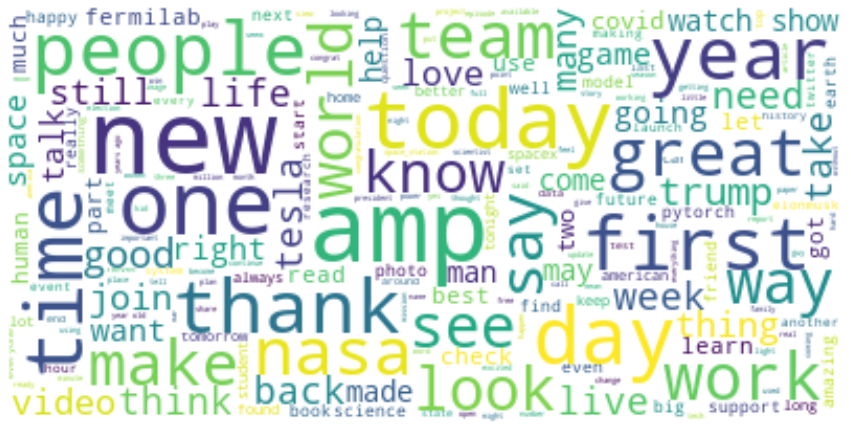

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sd = pd.to_datetime("2020-06-01").date()
ed = pd.to_datetime("2021-12-30").date()

newdf = df[(df['created_date']> sd) & (df['created_date']< ed)]
positive = df[df['sentiment_category']=='positive']

textdate = ' '.join([word for word in df['text_trans']])

wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(textdate)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
df['screen_name'].value_counts()

Astro_Soichi       1169
Nigel_Lockyer      1167
TheBabylonBee      1152
AstroVicGlover     1105
TheOnion           1052
                   ... 
machineIearning      11
chiisana_ippo        10
keywestover           6
BarneyGrahamMD        4
vanschneider          2
Name: screen_name, Length: 192, dtype: int64

In [25]:
df_elon = df[df['screen_name']=='elonmusk']
df_elon

text_trans created_date  \
5783                                 prometheus unbound   2020-12-03   
5864                                     love crazy ppl   2020-12-20   
6036                               watch demolition man   2020-12-03   
6134  year old son saxon said feels like 2021 good y...   2021-01-09   
6135                         launch underway wbk7zz0fqx   2021-01-08   
...                                                 ...          ...   
6698                          mad respect makers things   2020-03-03   
6699                    bernie tax rate high esaqayl9xb   2020-03-03   
6700              sleeving sn2 dome high bay zdruogd8xz   2020-03-03   
6701                               dogs rock vljgyzo5sx   2020-03-03   
6702                                     bro nj7cuyhr2j   2020-03-03   

     screen_name   user_id  sentiment sentiment_category  
5783    elonmusk  44196397     0.0000            neutral  
5864    elonmusk  44196397     0.4215           positive  
6036    elonmusk  44196397     0.0000            neutral  
6134    elonmusk  44196397     0.7845           positive  
6135    elonmusk  44196397     0.0000            neutral  
...          ...       ...        ...                ...  
6698    elonmusk  44196397    -0.0258           negative  
6699    elonmusk  44196397     0.0000            neutral  
6700    elonmusk  44196397     0.0000            neutral  
6701    elonmusk  44196397     0.0000            neutral  
6702    elonmusk  44196397     0.0000            neutral  

[571 rows x 6 columns]

(-0.5, 599.5, 399.5, -0.5)

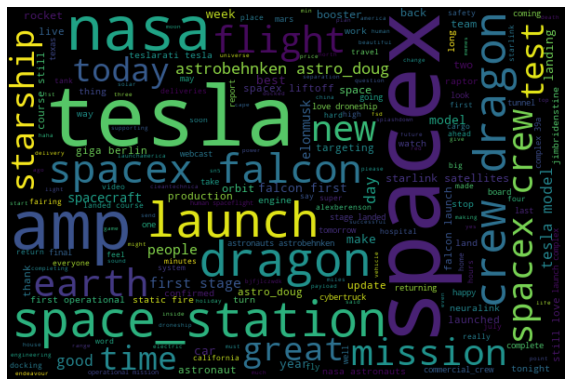

In [33]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

all_words = ' '.join([word for word in df_elon['text_trans']])

wordcloud = WordCloud(width = 600, height = 400, random_state = 2
                     , max_font_size = 100).generate(all_words)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')